In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Data/airline_passengers.csv', index_col = 'Month', parse_dates = True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [4]:
df.index.sort_values()

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [5]:
#Test dataset will be the most recent end of data(should be 20% of the total sample), this also depends how long sample is
#and how far ahead you want to forecast,the test set should be atleast as large as maximum forecast horizon required. Longer
#the forecast horizon, the more likely your prediction becomes less accurate.

train_data = df.iloc[:109] # or .loc[:1940-01-01]
test_data = df.iloc[108:] 

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing #triple smoothing function
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

d:\Anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [7]:
test_predictions = fitted_model.forecast(36) #forecast for 3 years

In [8]:
test_predictions

1958-02-01    339.142914
1958-03-01    399.281625
1958-04-01    394.233547
1958-05-01    402.545191
1958-06-01    473.128655
1958-07-01    521.795218
1958-08-01    514.513539
1958-09-01    446.216769
1958-10-01    385.430905
1958-11-01    339.645052
1958-12-01    381.455595
1959-01-01    401.210077
1959-02-01    387.159065
1959-03-01    455.812268
1959-04-01    450.049478
1959-05-01    459.537892
1959-06-01    540.114624
1959-07-01    595.671442
1959-08-01    587.358816
1959-09-01    509.392531
1959-10-01    440.000550
1959-11-01    387.732296
1959-12-01    435.462413
1960-01-01    458.013752
1960-02-01    441.973385
1960-03-01    520.346568
1960-04-01    513.767878
1960-05-01    524.599670
1960-06-01    616.584526
1960-07-01    680.007127
1960-08-01    670.517593
1960-09-01    581.512772
1960-10-01    502.296214
1960-11-01    442.627774
1960-12-01    497.115563
1961-01-01    522.859740
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

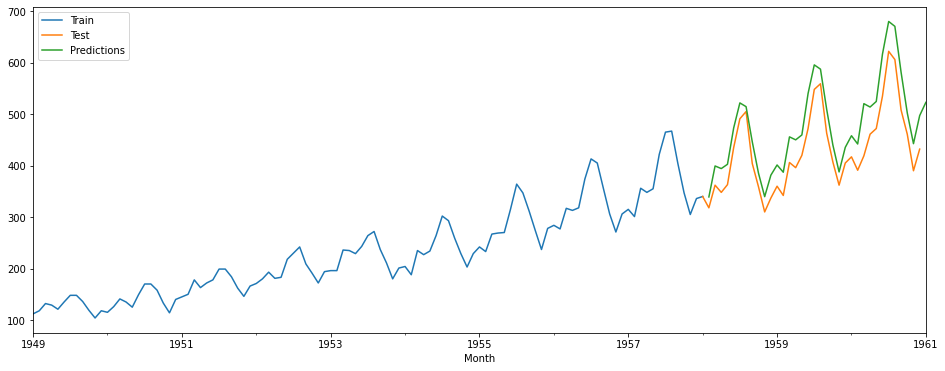

In [9]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(16,6))
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_predictions.plot(legend=True, label='Predictions') #test vs predictions

<AxesSubplot:xlabel='Month'>

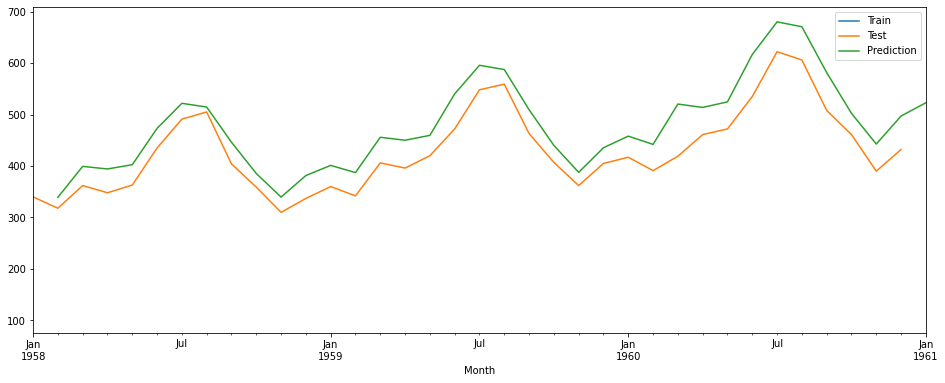

In [10]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(16,6))
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_predictions.plot(legend=True, label='Prediction', xlim= ['1958-01-01','1961-01-01'])  #To display the forecasted years

In [11]:
#Evaluation Metrics for model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [12]:
mean_absolute_error(test_data, test_predictions), np.sqrt(mean_squared_error(test_data, test_predictions))

(63.03104082299123, 74.92820898138402)

In [13]:
#Retraining the model on the entire dataset
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

d:\Anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [14]:
forecast_predictions = final_model.forecast(36)

<AxesSubplot:xlabel='Month'>

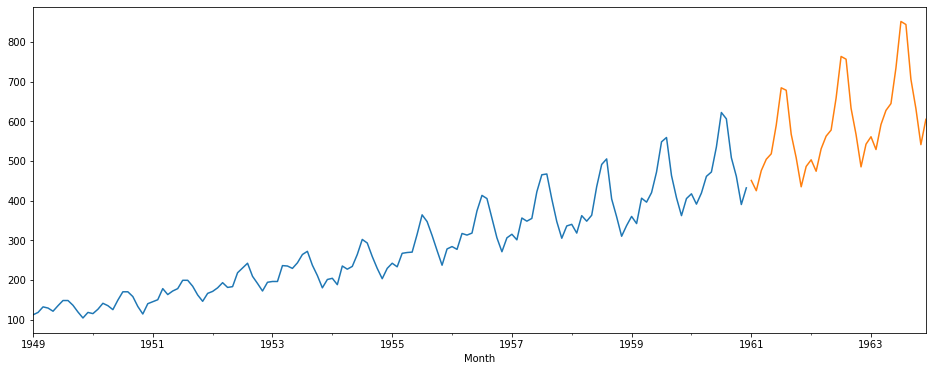

In [15]:
df['Thousands of Passengers'].plot(figsize=(16,6))
forecast_predictions.plot(figsize=(16,6))

In [17]:
#To check stationarity
df2 = pd.read_csv('Data/samples.csv', index_col=0, parse_dates=True)
df2

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62
...,...,...,...,...
1959-08-01,49,73,9338,58
1959-09-01,41,77,9502,38
1959-10-01,64,70,9667,42
1959-11-01,37,87,9833,62


<AxesSubplot:>

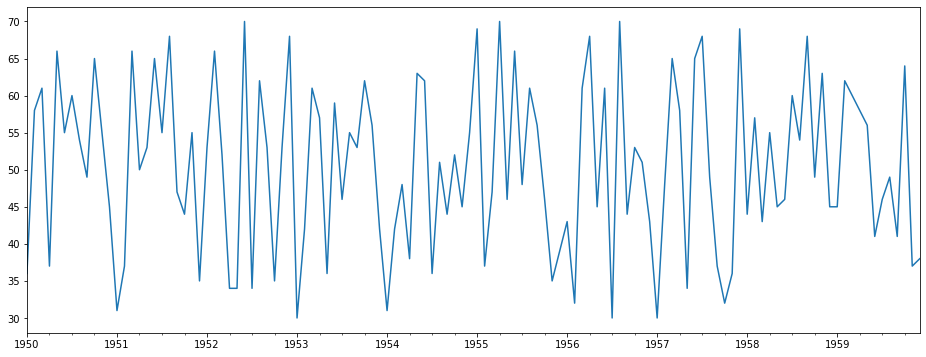

In [27]:
df2['a'].plot(figsize=(16,6)) #We can't figure any trend or seasonality so it's stationary data

<AxesSubplot:>

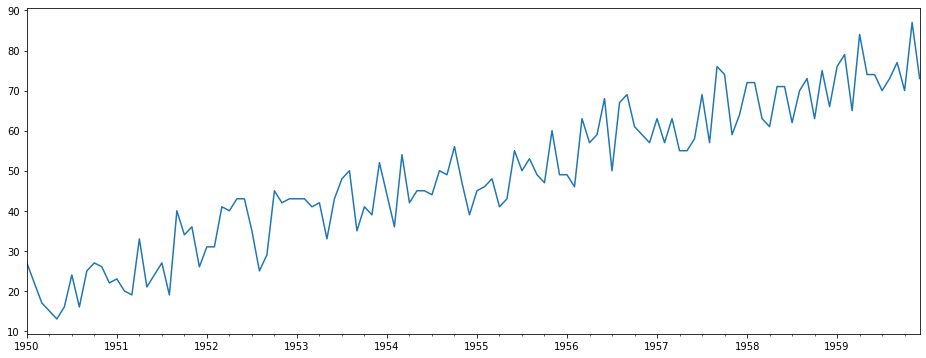

In [28]:
df2['b'].plot(figsize=(16,6)) #We can see trend or seasonality or both, so it's not stationary data

In [29]:
from statsmodels.tsa.statespace.tools import diff
df2['b'] - df2['b'].shift(1) #first order differnce

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

<AxesSubplot:>

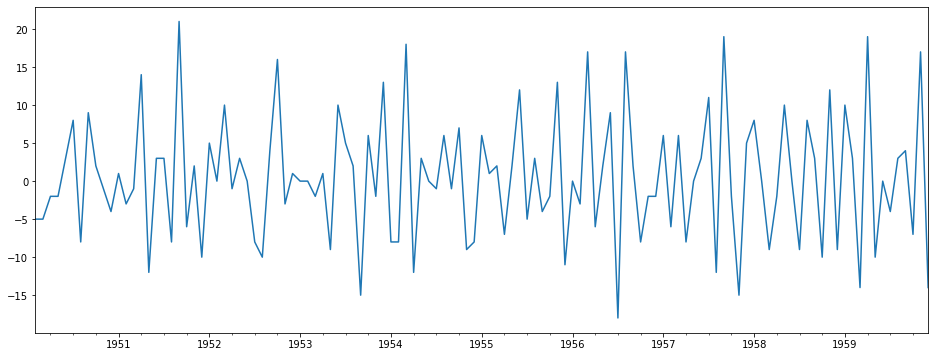

In [31]:
diff(df2['b'],k_diff=1).plot(figsize=(16,6))#It is converted into stationary 

## ACF and PACF

In [18]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [26]:
#Non stationary data
df1 = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'
df1.head(5)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [31]:
#Stationary dataset
df2 = pd.read_csv('Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'
df2.head(5)

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [34]:
df = pd.DataFrame({'a': [13,5,11,12,9]}) # dummy data to calculate the correlations in ACF and PACF
df

,a
0,13
1,5
2,11
3,12
4,9


In [36]:
#To see the autocorrelation in 1 dimension
acf(df['a']) #function displaying the correlation values with lagged time series

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [40]:
pacf_yw(df['a'], nlags=4, method='mle') #mle- maximum likelihood estimation or method = 'unbiased'

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [41]:
pacf_ols(df['a'], nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

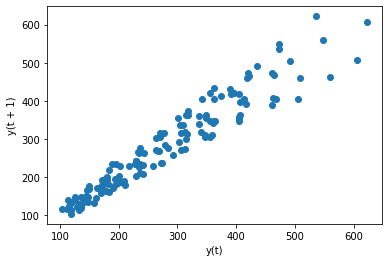

In [44]:
#Plotting ACF and PACF
from pandas.plotting import lag_plot

lag_plot(df1['Thousands of Passengers']) #lagged values on the y axis, showing strong correlation with the lagged values
#due to seasonality

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

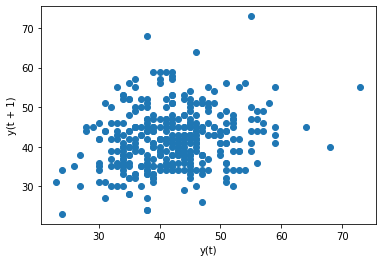

In [45]:
lag_plot(df2['Births']) #Not strong correlations due to lack of seasonality

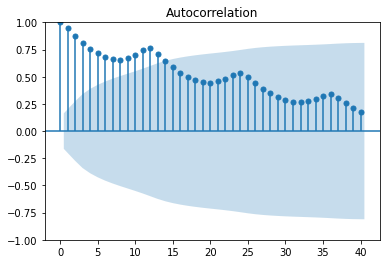

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df1, lags=40); #we can see peaks, due to seasonality( at certain points autocorrelations increase)
#The blue region represnts 95% CI, We are more confident of the correlations with smaller lags than larger lags

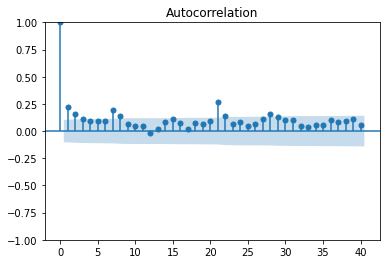

In [50]:
plot_acf(df2, lags=40); #sharp drop off, because of absence of seasonality

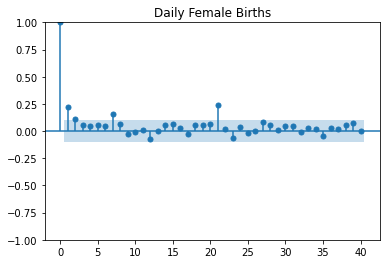

In [52]:
plot_pacf(df2, lags=40, title='Daily Female Births');